In [31]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import sys
sys.path.append("../../../analysisTools/")
from analysisTools import Analyzer
from analysisTools import loadSchema
import analysisTools as tools
import analysisSubroutines as routines
import plotTools as ptools
import utils
import importlib
import coffea.util as util
import time
import json
import os
import glob
import pandas as pd
import mplhep as hep

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import coffea files

In [32]:
prefix = './coffea/'
suffix = '_collinear2D'

In [33]:
bkg_histo = util.load(f'{prefix}/background_VR{suffix}.coffea')[0]

In [34]:
data_histo = util.load(f'{prefix}/data_VR{suffix}.coffea')[0]

In [35]:
sig_histo = util.load(f'{prefix}/signal_VR{suffix}.coffea')[0]

In [36]:
utils.get_signal_list_of_cuts(sig_histo)

['Preselections',
 'n(good vertex) > 0',
 'computing BDT score',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 2',
 'dPhi(MET,all jets) > 0.75',
 'Vtx CosCollinear < 0',
 'Vtx CosCollinear > -0.75']

### Efficiency

In [37]:
df_signal = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
df_signal

,Preselections,n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2","dPhi(MET,all jets) > 0.75",Vtx CosCollinear < 0,Vtx CosCollinear > -0.75
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,4.43,1.44,1.44,1.24,1.21,1.21,1.21,1.20,0.07,0.04
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,0.16,0.06,0.06,0.05,0.05,0.05,0.05,0.05,0.01,0.00
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,3.37,1.72,1.72,1.49,1.45,1.45,1.45,1.44,0.14,0.08
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,43.31,16.38,16.38,14.12,13.73,13.72,13.72,13.61,1.77,1.10
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,4.29,2.15,2.15,1.84,1.79,1.79,1.79,1.77,0.15,0.09
...,...,...,...,...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,33.27,12.64,12.64,10.88,10.58,10.57,10.57,10.46,1.55,0.94
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,"21,863.06","5,577.99","5,577.99","4,755.93","4,652.65","4,652.65","4,652.65","4,619.77",155.12,37.61
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,913.50,304.58,304.58,258.14,251.59,251.59,251.59,248.85,22.59,13.94
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,3.50,1.19,1.19,1.02,1.00,1.00,1.00,0.99,0.07,0.04


In [38]:
df_signal = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched')
df_signal

,Preselections,n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2","dPhi(MET,all jets) > 0.75",Vtx CosCollinear < 0,Vtx CosCollinear > -0.75
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,1.00,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.82,0.86
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,1.00,0.96,0.96,0.96,0.96,0.96,0.96,0.97,0.89,0.92
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,1.00,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.92,0.94
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,1.00,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.94,0.95
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,1.00,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.92,0.98
...,...,...,...,...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,1.00,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.95,0.98
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,1.00,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.48,0.37
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,1.00,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.89,0.91
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,1.00,0.96,0.96,0.97,0.97,0.97,0.97,0.97,0.85,0.89


In [39]:
df_bkg = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
df_bkg

,Preselections,n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2","dPhi(MET,all jets) > 0.75",Vtx CosCollinear < 0,Vtx CosCollinear > -0.75
Multiboson,"2,156.81",18.83,18.83,12.81,11.48,11.06,10.77,10.50,3.17,1.45
WJets,"93,278.66",684.49,684.49,555.78,535.70,533.59,532.70,489.98,159.65,49.69
Top,"3,966.40",66.32,66.32,49.98,45.01,41.87,41.85,33.10,5.57,1.34
QCD,"9,553.01",80.77,80.77,0.47,0.47,0.47,0.47,0.00,0.00,0.00
DY,"1,895.29",30.41,30.41,27.03,23.65,23.65,23.65,23.65,6.76,6.76
ZJets,"28,746.13",392.58,392.58,325.98,311.20,309.96,309.04,292.60,91.12,36.92
Total,"139,596.30","1,273.39","1,273.39",972.04,927.51,920.60,918.47,849.83,266.27,96.16


In [40]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df['Vtx CosCollinear > -0.75']).transpose(), pd.DataFrame(bkg_cts_raw_df['Vtx CosCollinear > -0.75']).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,Multiboson,WJets,Top,QCD,DY,ZJets,Total
Weighted Counts,1.45,49.69,1.34,0.00,6.76,36.92,96.16
Raw Counts,10.00,133.00,25.00,0.00,2.00,225.00,395.00


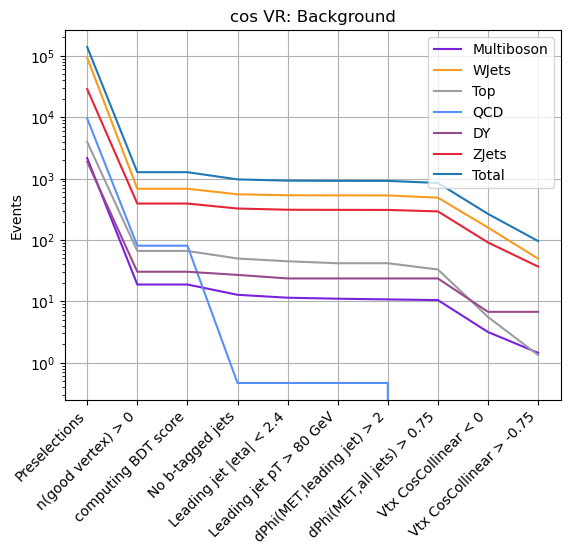

In [41]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

ptools.plot_bkg_efficiency(bkg_histo, df, doLog = True, ylabel = 'Events', title = 'cos VR: Background')

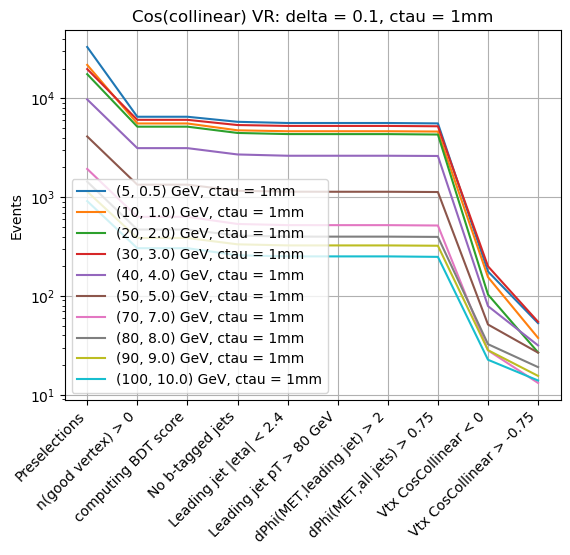

In [42]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.1]
ctaus = [1]

title = f'Cos(collinear) VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

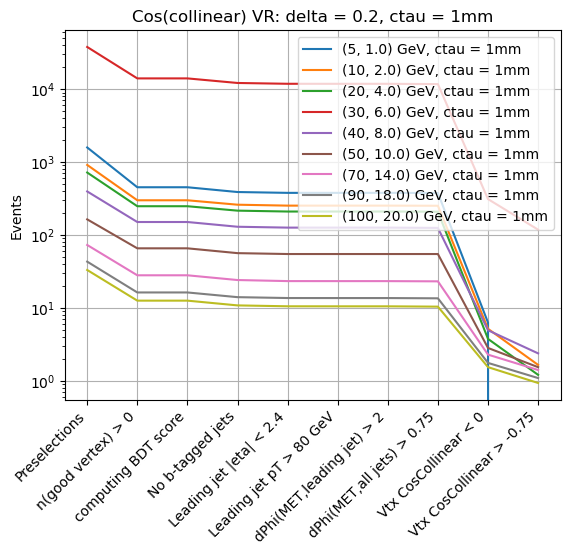

In [43]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.2]
ctaus = [1]

title = f'Cos(collinear) VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

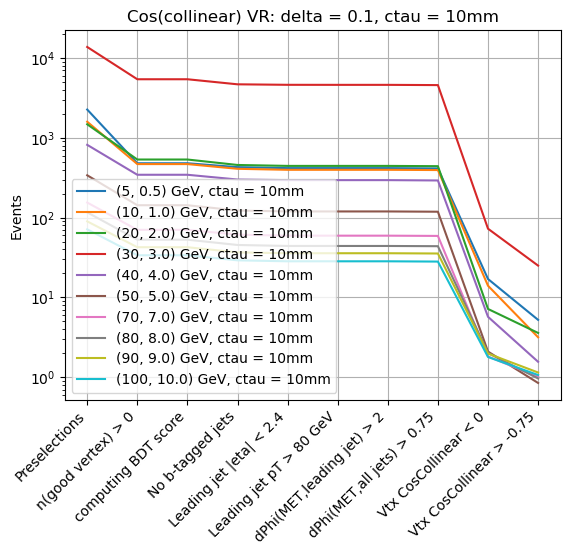

In [44]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.1]
ctaus = [10]

title = f'Cos(collinear) VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

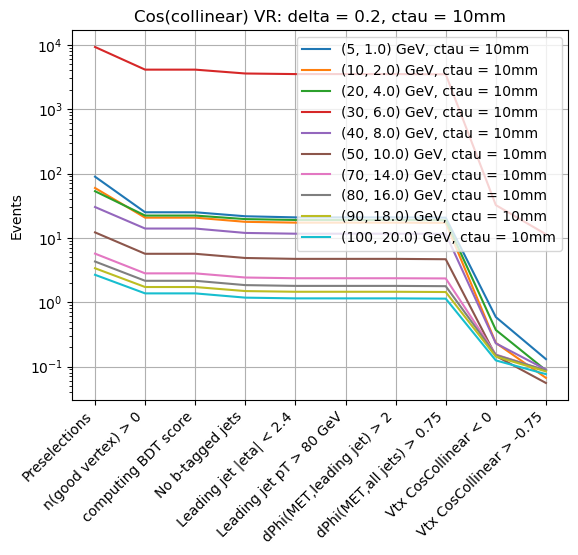

In [45]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.2]
ctaus = [10]

title = f'Cos(collinear) VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

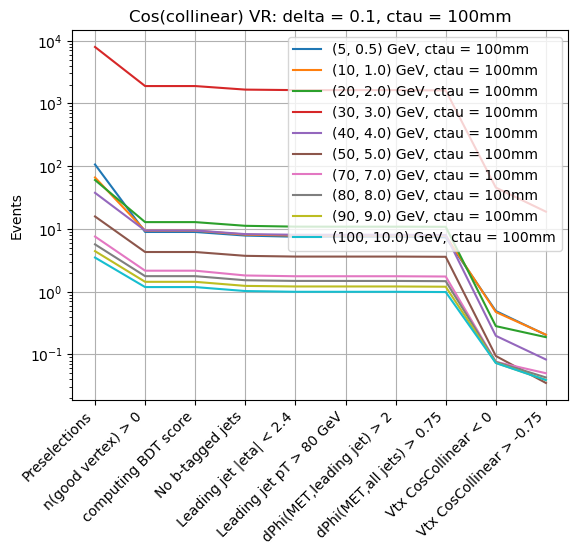

In [46]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.1]
ctaus = [100]

title = f'Cos(collinear) VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

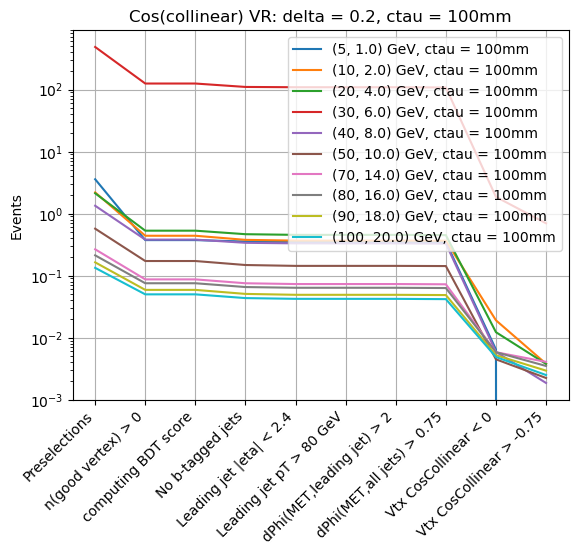

In [47]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.2]
ctaus = [100]

title = f'Cos(collinear) VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'cos_collinear',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 25j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histo, plot_dict, style_dict, isLegacy = False)

# signal points
m1s = [20]
deltas = [0.1]
ctaus = [10]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('After ISR Cut')
plt.legend()
plt.show()

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/mplhep/utils.py:199: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


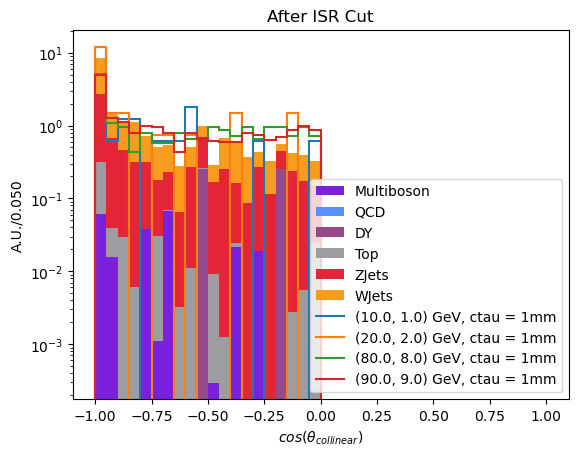

In [58]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'cos_collinear',
    'cut': 'cut10',
}

style_dict = {
    'rebin': 25j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histo, plot_dict, style_dict, isLegacy = False)

# signal points
m1s = [10, 20, 80, 90]
deltas = [0.1]
ctaus = [1]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('After ISR Cut')
plt.legend()
plt.show()